In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
#from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

#from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

In [6]:
len(X.columns)

79

In [7]:
CB = CatBoostRegressor(verbose=False)

In [8]:
CB.fit(X_train, Y_train)

In [9]:
CB.score(X_test, Y_test)

0.9372946052127878

In [10]:
cb_results_train = CB.predict(X_train)

In [11]:
cb_results_test = CB.predict(X_test)

In [12]:
X_train_cb = X_train.assign(CB = cb_results_train)
X_train_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
2226,11.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1576,144.000000,21384,5,6,1923,2004,0.0,1309.0,0.0,15.0,1324.0,1072,504,0,2.0,0.0,1,1,3,1,6,1,1923.0,2.0,528.0,0,312,0,0,0,0,0,221939.989335
2485,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1535,70.000000,10171,7,5,2004,2004,168.0,2.0,0.0,1515.0,1517.0,1535,0,0,0.0,0.0,2,0,3,1,7,0,2004.0,2.0,532.0,0,0,0,0,0,0,0,202266.197307
445,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,22.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,2.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,1416,68.516053,25339,5,7,1918,2007,0.0,0.0,0.0,816.0,816.0,1416,0,0,0.0,0.0,2,0,3,1,7,0,2007.0,2.0,576.0,0,0,112,0,0,0,0,123796.428956
609,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,23.0,5.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,0.0,9.0,0.0,1141,63.000000,13072,6,5,2005,2005,0.0,0.0,0.0,1141.0,1141.0,1141,0,0,0.0,0.0,1,1,3,1,6,0,2005.0,2.0,484.0,0,0,0,0,0,0,0,140012.930358
2315,10.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,3.0,2.0,1.0,2.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,2142,100.000000,13000,6,6,1968,1968,576.0,448.0,0.0,448.0,896.0,1182,960,0,0.0,0.0,2,1,4,1,8,1,1968.0,1.0,509.0,0,72,0,0,252,0,0,205324.201717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,2.0,1.0,5.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,1.0,1.0,6.0,2.0,9.0,4.0,816,59.000000,6490,5,7,1983,1983,0.0,534.0,0.0,282.0,816.0,816,0,0,0.0,1.0,1,0,2,1,4,0,1983.0,1.0,264.0,315,0,0,0,0,0,0,129470.060929
1953,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,2.0,3.0,1.0,5.0,2.0,3.0,1.0,1.0,9.0,1.0,9.0,4.0,914,68.516053,17199,4,7,1961,1961,0.0,314.0,0.0,600.0,914.0,914,0,0,0.0,0.0,1,0,2,1,4,0,1961.0,1.0,270.0,140,0,0,0,0,0,0,127380.637850
1761,11.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,3.0,0.0,13.0,14.0,2.0,3.0,2.0,2.0,5.0,1.0,3.0,6.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,5.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,1502,55.000000,10592,6,7,1923,1996,0.0,0.0,0.0,602.0,602.0,900,602,0,0.0,0.0,1,1,3,1,7,2,1923.0,1.0,180.0,96,0,112,0,53,0,0,170043.571473
1026,13.0,5.0,1.0,1.0,1.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,7.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,1.0,9.0,4.0,1119,

In [13]:
X_test_cb = X_test.assign(CB = cb_results_test)
X_test_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
6,5.0,6.0,1.0,2.0,3.0,0.0,0.0,4.0,1.0,20.0,2.0,2.0,1.0,2.0,1.0,0.0,8.0,8.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,936,60.000000,6000,4,4,1953,1953,0.0,0.0,0.0,936.0,936.0,936,0,0,0.0,0.0,1,0,2,1,4,0,1974.000000,2.0,576.0,0,32,112,0,0,0,0,80714.785252
1447,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,3.0,9.0,4.0,2200,117.000000,15262,8,5,2003,2004,470.0,1557.0,0.0,643.0,2200.0,2200,0,0,1.0,0.0,2,1,3,1,8,1,2003.000000,3.0,685.0,208,55,0,0,0,0,0,396653.262462
2456,2.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,3.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,1.0,1.0,6.0,1.0,0.0,4.0,1092,21.000000,1890,4,3,1976,1976,0.0,0.0,0.0,546.0,546.0,546,546,0,0.0,0.0,1,1,3,1,6,0,1976.000000,1.0,286.0,0,0,0,0,0,0,0,76312.317327
762,4.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,1.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,5.0,2.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,7.0,0.0,9.0,4.0,1118,65.000000,7800,5,7,1939,1950,0.0,507.0,0.0,286.0,793.0,793,325,0,1.0,0.0,1,0,3,1,5,1,1939.000000,2.0,410.0,0,0,0,0,271,0,0,130470.386425
163,14.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,6.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,5.0,2.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,9.0,4.0,1280,68.516053,10050,5,6,1966,1966,87.0,602.0,0.0,191.0,793.0,1280,0,0,0.0,1.0,2,0,3,1,6,1,1966.000000,2.0,432.0,140,40,0,0,0,0,0,155121.439311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,6.0,2.0,3.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,1.0,5.0,2.0,3.0,1.0,1.0,7.0,1.0,9.0,4.0,1346,70.000000,11767,4,7,1910,2000,0.0,0.0,0.0,560.0,560.0,796,550,0,0.0,0.0,1,1,2,1,6,0,1950.000000,1.0,384.0,168,24,0,0,0,0,0,117148.282518
2217,2.0,2.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,24.0,2.0,2.0,4.0,5.0,1.0,0.0,8.0,8.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,1512,68.516053,2980,6,5,2000,2000,1159.0,466.0,0.0,290.0,756.0,756,756,0,1.0,0.0,2,1,2,1,5,0,2000.000000,2.0,440.0,0,32,0,0,0,0,0,187104.400882
44,11.0,5.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,6.0,2.0,3.0,2.0,1.0,2.0,5.0,0.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1534,60.000000,10800,5,9,1895,1999,0.0,0.0,0.0,736.0,736.0,751,783,0,0.0,0.0,1,1,3,1,6,0,1976.982048,0.0,0.0,0,112,0,0,0,0,0,133444.660226
1150,4.0,4.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,1.0,5.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,5.0,5.0,2.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,9.0,

In [14]:
Y_train

2226    223500
2485    214000
445     112000
609     142500
2315    193500
         ...  
2427    128500
1953    128000
1761    165000
1026    188500
2462    100000
Name: SalePrice, Length: 1935, dtype: int64

In [15]:
X_train_full = X_train_cb.assign(SalePrice = Y_train)
X_train_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
2226,11.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1576,144.000000,21384,5,6,1923,2004,0.0,1309.0,0.0,15.0,1324.0,1072,504,0,2.0,0.0,1,1,3,1,6,1,1923.0,2.0,528.0,0,312,0,0,0,0,0,221939.989335,223500
2485,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1535,70.000000,10171,7,5,2004,2004,168.0,2.0,0.0,1515.0,1517.0,1535,0,0,0.0,0.0,2,0,3,1,7,0,2004.0,2.0,532.0,0,0,0,0,0,0,0,202266.197307,214000
445,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,22.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,2.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,1416,68.516053,25339,5,7,1918,2007,0.0,0.0,0.0,816.0,816.0,1416,0,0,0.0,0.0,2,0,3,1,7,0,2007.0,2.0,576.0,0,0,112,0,0,0,0,123796.428956,112000
609,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,23.0,5.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,0.0,9.0,0.0,1141,63.000000,13072,6,5,2005,2005,0.0,0.0,0.0,1141.0,1141.0,1141,0,0,0.0,0.0,1,1,3,1,6,0,2005.0,2.0,484.0,0,0,0,0,0,0,0,140012.930358,142500
2315,10.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,3.0,2.0,1.0,2.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,2142,100.000000,13000,6,6,1968,1968,576.0,448.0,0.0,448.0,896.0,1182,960,0,0.0,0.0,2,1,4,1,8,1,1968.0,1.0,509.0,0,72,0,0,252,0,0,205324.201717,193500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,2.0,1.0,5.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,1.0,1.0,6.0,2.0,9.0,4.0,816,59.000000,6490,5,7,1983,1983,0.0,534.0,0.0,282.0,816.0,816,0,0,0.0,1.0,1,0,2,1,4,0,1983.0,1.0,264.0,315,0,0,0,0,0,0,129470.060929,128500
1953,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,2.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,2.0,3.0,1.0,5.0,2.0,3.0,1.0,1.0,9.0,1.0,9.0,4.0,914,68.516053,17199,4,7,1961,1961,0.0,314.0,0.0,600.0,914.0,914,0,0,0.0,0.0,1,0,2,1,4,0,1961.0,1.0,270.0,140,0,0,0,0,0,0,127380.637850,128000
1761,11.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,3.0,0.0,13.0,14.0,2.0,3.0,2.0,2.0,5.0,1.0,3.0,6.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,5.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,1502,55.000000,10592,6,7,1923,1996,0.0,0.0,0.0,602.0,602.0,900,602,0,0.0,0.0,1,1,3,1,7,2,1923.0,1.0,180.0,96,0,112,0,53,0,0,170043.571473,165000
1026,13.0,5.0,1.0,1.0,1.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,7.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0

In [16]:
X_test_full = X_test_cb.assign(SalePrice = Y_test)
X_test_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
6,5.0,6.0,1.0,2.0,3.0,0.0,0.0,4.0,1.0,20.0,2.0,2.0,1.0,2.0,1.0,0.0,8.0,8.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,936,60.000000,6000,4,4,1953,1953,0.0,0.0,0.0,936.0,936.0,936,0,0,0.0,0.0,1,0,2,1,4,0,1974.000000,2.0,576.0,0,32,112,0,0,0,0,80714.785252,93000
1447,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,3.0,9.0,4.0,2200,117.000000,15262,8,5,2003,2004,470.0,1557.0,0.0,643.0,2200.0,2200,0,0,1.0,0.0,2,1,3,1,8,1,2003.000000,3.0,685.0,208,55,0,0,0,0,0,396653.262462,382500
2456,2.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,3.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,1.0,1.0,6.0,1.0,0.0,4.0,1092,21.000000,1890,4,3,1976,1976,0.0,0.0,0.0,546.0,546.0,546,546,0,0.0,0.0,1,1,3,1,6,0,1976.000000,1.0,286.0,0,0,0,0,0,0,0,76312.317327,75190
762,4.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,1.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,5.0,2.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,7.0,0.0,9.0,4.0,1118,65.000000,7800,5,7,1939,1950,0.0,507.0,0.0,286.0,793.0,793,325,0,1.0,0.0,1,0,3,1,5,1,1939.000000,2.0,410.0,0,0,0,0,271,0,0,130470.386425,119900
163,14.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,6.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,1.0,5.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,5.0,2.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,9.0,4.0,1280,68.516053,10050,5,6,1966,1966,87.0,602.0,0.0,191.0,793.0,1280,0,0,0.0,1.0,2,0,3,1,6,1,1966.000000,2.0,432.0,140,40,0,0,0,0,0,155121.439311,175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,6.0,2.0,3.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,1.0,5.0,2.0,3.0,1.0,1.0,7.0,1.0,9.0,4.0,1346,70.000000,11767,4,7,1910,2000,0.0,0.0,0.0,560.0,560.0,796,550,0,0.0,0.0,1,1,2,1,6,0,1950.000000,1.0,384.0,168,24,0,0,0,0,0,117148.282518,112000
2217,2.0,2.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,24.0,2.0,2.0,4.0,5.0,1.0,0.0,8.0,8.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,1512,68.516053,2980,6,5,2000,2000,1159.0,466.0,0.0,290.0,756.0,756,756,0,1.0,0.0,2,1,2,1,5,0,2000.000000,2.0,440.0,0,32,0,0,0,0,0,187104.400882,177000
44,11.0,5.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,6.0,2.0,3.0,2.0,1.0,2.0,5.0,0.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1534,60.000000,10800,5,9,1895,1999,0.0,0.0,0.0,736.0,736.0,751,783,0,0.0,0.0,1,1,3,1,6,0,1976.982048,0.0,0.0,0,112,0,0,0,0,0,133444.660226,148000
1150,4.0,4.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,1.0,5.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,5.0,5.0,2.0,6.0,

In [17]:
combo = pd.concat([X_train_full, X_test_full], axis=0)
combo

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
2226,11.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1576,144.000000,21384,5,6,1923,2004,0.0,1309.0,0.0,15.0,1324.0,1072,504,0,2.0,0.0,1,1,3,1,6,1,1923.000000,2.0,528.0,0,312,0,0,0,0,0,221939.989335,223500
2485,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1535,70.000000,10171,7,5,2004,2004,168.0,2.0,0.0,1515.0,1517.0,1535,0,0,0.0,0.0,2,0,3,1,7,0,2004.000000,2.0,532.0,0,0,0,0,0,0,0,202266.197307,214000
445,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,22.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,2.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,1416,68.516053,25339,5,7,1918,2007,0.0,0.0,0.0,816.0,816.0,1416,0,0,0.0,0.0,2,0,3,1,7,0,2007.000000,2.0,576.0,0,0,112,0,0,0,0,123796.428956,112000
609,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,23.0,5.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,0.0,9.0,0.0,1141,63.000000,13072,6,5,2005,2005,0.0,0.0,0.0,1141.0,1141.0,1141,0,0,0.0,0.0,1,1,3,1,6,0,2005.000000,2.0,484.0,0,0,0,0,0,0,0,140012.930358,142500
2315,10.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,3.0,2.0,1.0,2.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,2142,100.000000,13000,6,6,1968,1968,576.0,448.0,0.0,448.0,896.0,1182,960,0,0.0,0.0,2,1,4,1,8,1,1968.000000,1.0,509.0,0,72,0,0,252,0,0,205324.201717,193500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,6.0,2.0,3.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,1.0,5.0,2.0,3.0,1.0,1.0,7.0,1.0,9.0,4.0,1346,70.000000,11767,4,7,1910,2000,0.0,0.0,0.0,560.0,560.0,796,550,0,0.0,0.0,1,1,2,1,6,0,1950.000000,1.0,384.0,168,24,0,0,0,0,0,117148.282518,112000
2217,2.0,2.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,24.0,2.0,2.0,4.0,5.0,1.0,0.0,8.0,8.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,1512,68.516053,2980,6,5,2000,2000,1159.0,466.0,0.0,290.0,756.0,756,756,0,1.0,0.0,2,1,2,1,5,0,2000.000000,2.0,440.0,0,32,0,0,0,0,0,187104.400882,177000
44,11.0,5.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,6.0,2.0,3.0,2.0,1.0,2.0,5.0,0.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1534,60.000000,10800,5,9,1895,1999,0.0,0.0,0.0,736.0,736.0,751,783,0,0.0,0.0,1,1,3,1,6,0,1976.982048,0.0,0.0,0,112,0,0,0,0,0,133444.660226,148000
1150,4.0,4.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,1.0,5.0,1.0,0.0,12.0,13.0,2.0,3.0,4.

In [18]:
X_gb = combo.drop(['SalePrice'], axis=1)
y_gb = combo.SalePrice

In [19]:
gbm = GradientBoostingRegressor()

In [20]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error',
          }

In [21]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [22]:
dfs = evaluate_model(gbm, X_gb, y_gb)

In [23]:
gb_df = dfs[['test_r2', 'test_neg_mae']]
gb_df = gb_df.assign(MAE = gb_df['test_neg_mae'].abs())
gb_df = gb_df.rename(columns = {'test_r2':'CB+GB R2', 'MAE':'CB+GB MAE'})
gb_df

,CB+GB R2,test_neg_mae,CB+GB MAE
0,0.976766,-6989.709259,6989.709259
1,0.980163,-6880.997677,6880.997677
2,0.981555,-7137.535534,7137.535534
3,0.966034,-7519.652101,7519.652101
4,0.976261,-7116.369278,7116.369278
5,0.972185,-7207.115119,7207.115119
6,0.975044,-7551.543639,7551.543639
7,0.982642,-6813.064322,6813.064322
8,0.978950,-6934.417120,6934.417120
9,0.976146,-6667.369117,6667.369117


In [24]:
gb_df.to_csv('CB+GB.csv', index=False)

In [25]:
gb_df.describe()

,CB+GB R2,test_neg_mae,CB+GB MAE
count,15.000000,15.000000,15.000000
mean,0.976232,-7127.594515,7127.594515
std,0.004453,371.395496,371.395496
min,0.966034,-7830.567499,6651.421295
25%,0.974276,-7363.383610,6870.751234
50%,0.976766,-7025.587185,7025.587185
75%,0.979297,-6870.751234,7363.383610
max,0.982642,-6651.421295,7830.567499


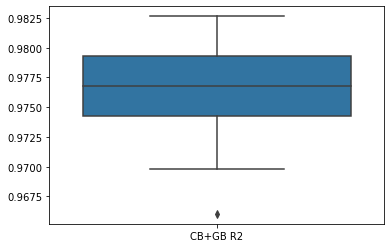

In [27]:
sns.boxplot(data=gb_df[['CB+GB R2']]);

In [28]:
X_trainGB, X_testGB, Y_trainGB, Y_testGB = train_test_split(X_gb,y_gb,test_size=0.25)
    
gbm.fit(X_trainGB, Y_trainGB)
y_pred = gbm.predict(X_testGB)

GB_Score = r2_score(Y_testGB, y_pred)
GB_Score

0.9684176950821686

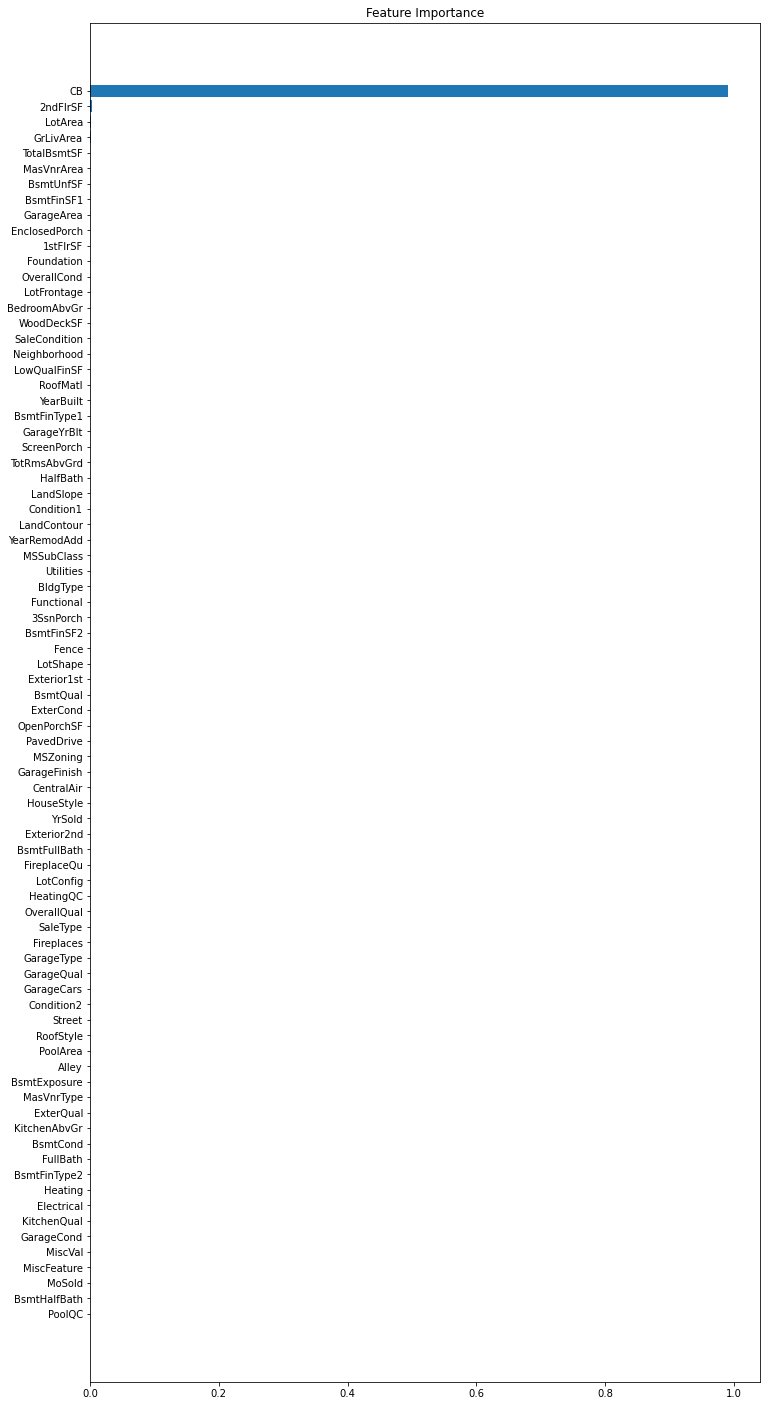

In [29]:
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 25))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_testGB.columns)[sorted_idx])
plt.title('Feature Importance');

In [30]:
X_cols = combo.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('CB', 0.990127295825621),
 ('2ndFlrSF', 0.0025547456921711973),
 ('LotArea', 0.0016330778756362884),
 ('GrLivArea', 0.0010233365057446585),
 ('TotalBsmtSF', 0.000579069945430789),
 ('MasVnrArea', 0.0005203994301746208),
 ('BsmtUnfSF', 0.000270684021785023),
 ('BsmtFinSF1', 0.0002579108959330401),
 ('GarageArea', 0.00023081651415846248),
 ('EnclosedPorch', 0.00021890883639810269),
 ('1stFlrSF', 0.0001961351220521224),
 ('Foundation', 0.0001798665990326617),
 ('OverallCond', 0.00017586681545258528),
 ('LotFrontage', 0.0001693731100534737),
 ('BedroomAbvGr', 0.00016378632176379174),
 ('WoodDeckSF', 0.00014274259897804821),
 ('SaleCondition', 0.00013666605675822534),
 ('Neighborhood', 0.00011951338758857353),
 ('LowQualFinSF', 0.00011183193551822381),
 ('RoofMatl', 0.00010333960014921909),
 ('YearBuilt', 9.509054812576399e-05),
 ('BsmtFinType1', 7.772900825222333e-05),
 ('GarageYrBlt', 7.712566909704478e-05),
 ('ScreenPorch', 6.91513258814239e-05),
 ('TotRmsAbvGrd', 6.867376770153754e-05

In [36]:
gbm.predict(X_gb)

array([229149.44502615, 204556.85160452, 122779.59454287, ...,
       131114.6796653 , 137087.40495757, 255473.03803803])